# Classifying Heart Disease

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

heart = pd.read_csv('heart_disease.csv')

## Exploring the Dataset

In [150]:
# Let's see what's in the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


We can find a description of the variables [here](https://archive.ics.uci.edu/dataset/45/heart+disease#:~:text=Journal%20of%20Cardiology-,Variables%20Table,-Variable%20Name).

In [151]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [152]:
# Explore the object columns
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [153]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

Both of these variables could be useful in our model so it will be worth transforming them into numeric columns. We will need to deal with the "?" in each. 

"ca" is a numerical feature so we'll impute the median into the "?" rows. 

"thal" is categorical so we'll use the mode. 

In [154]:
# Impute median into "ca"
heart['ca'] = heart['ca'].replace('?', np.nan)
heart['ca'] = pd.to_numeric(heart['ca'])
heart['ca'] = heart['ca'].apply(lambda x: heart['ca'].median() if pd.isna(x) else x)

In [155]:
heart['thal'].mode()[0]

'3.0'

In [156]:
# Impute mode into "thal"
heart['thal'] = heart['thal'].replace('?', np.nan)
heart['thal'] = pd.to_numeric(heart['thal'])
mode_value = heart['thal'].mode()[0]
heart['thal'].fillna(mode_value, inplace=True)

There are a few categorical columns in the dataset so I will also build out some dummy variables. 

In [157]:
# Categorical columns to transform
good_cats = ['cp','restecg']

# Turn into categorical
heart[good_cats] = heart[good_cats].astype('category')

# Create dummy variables
dum_heart = pd.get_dummies(heart[good_cats], drop_first=True)

# Join back to the dataset
heart_cl = pd.concat([heart, dum_heart],axis=1)

In [158]:
heart_cl

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present,cp_2,cp_3,cp_4,restecg_1,restecg_2
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,0,0,0,1
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,0,0,1,0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,0,0,1,0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,1,0,0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,0,0,0,0,0
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,0,0,1,0,0
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,0,0,1,0,0
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1,0,0,0,1


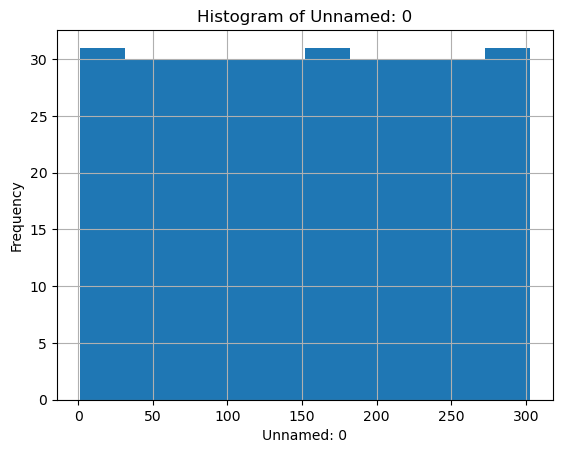

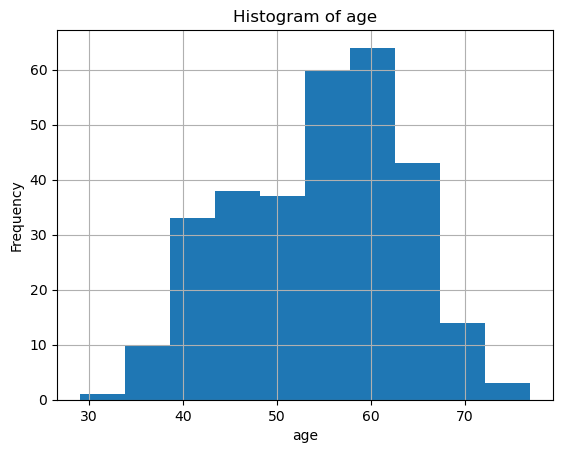

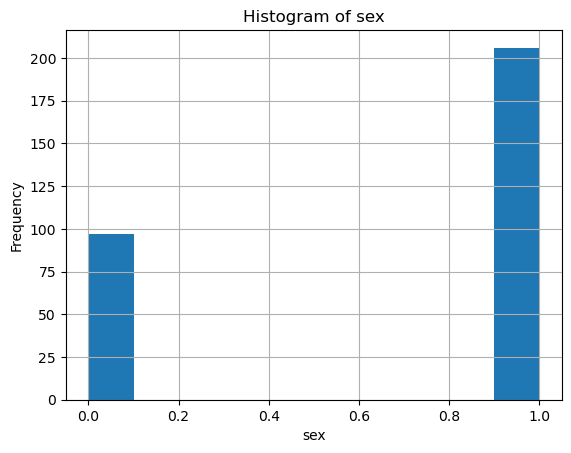

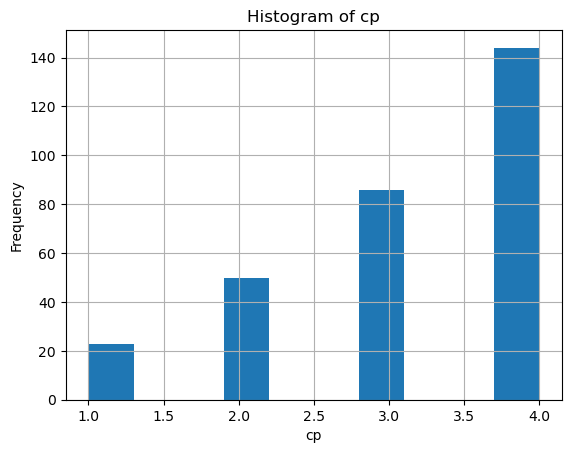

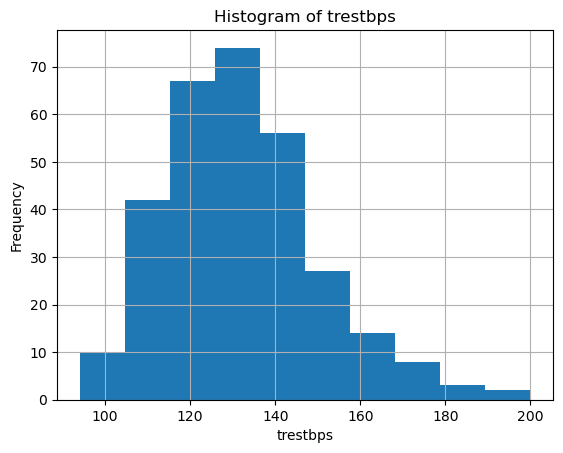

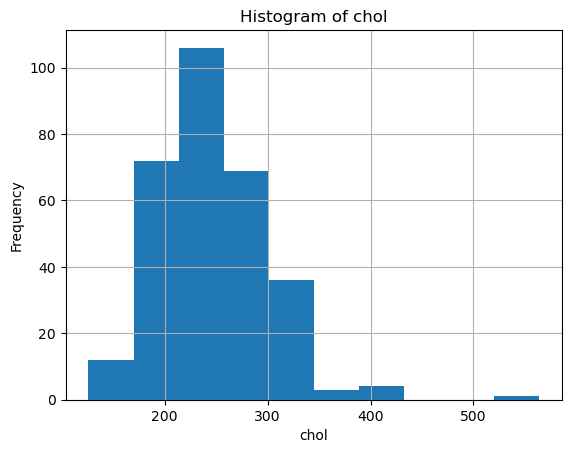

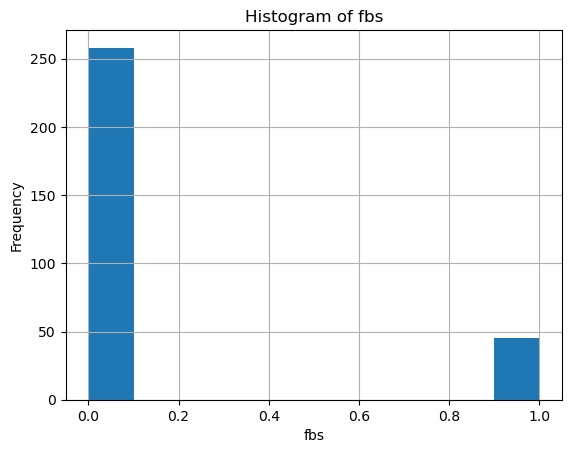

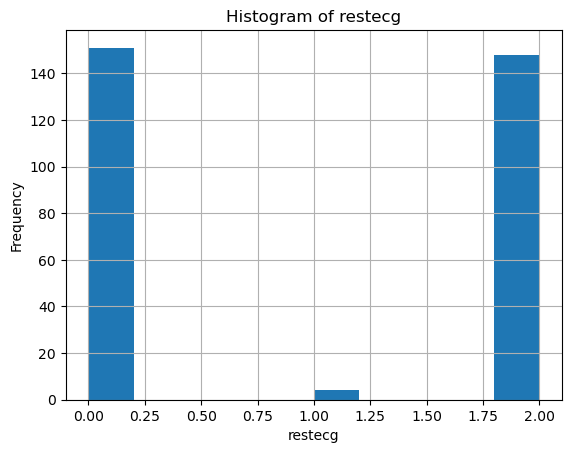

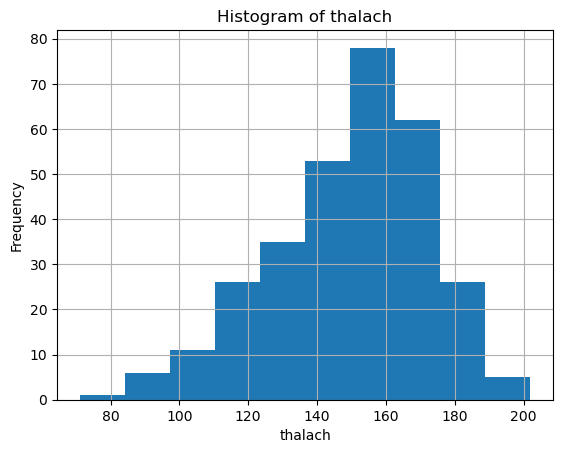

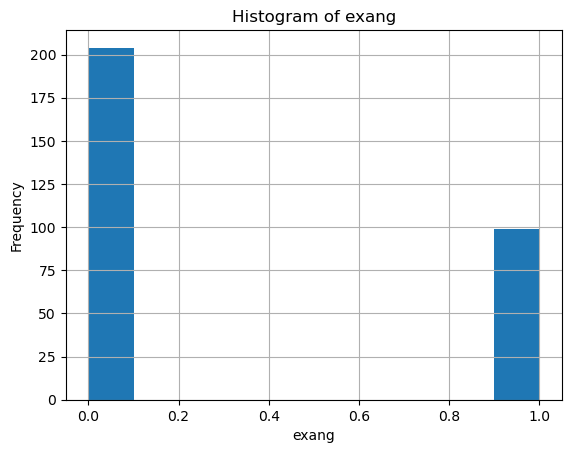

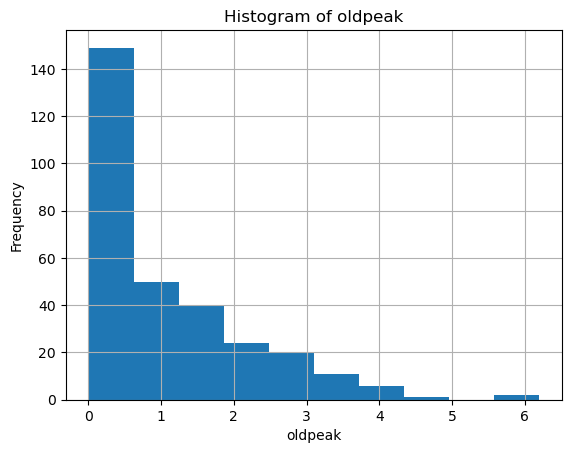

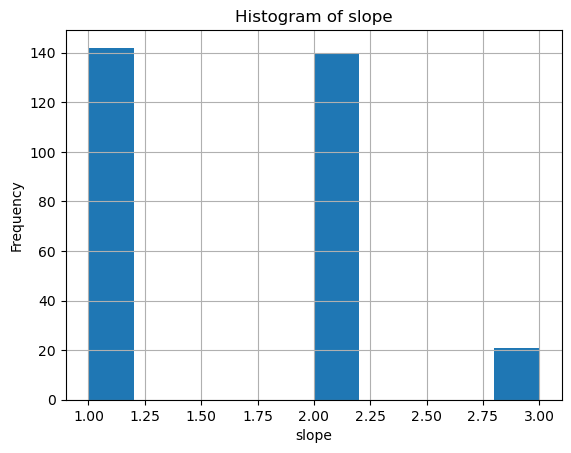

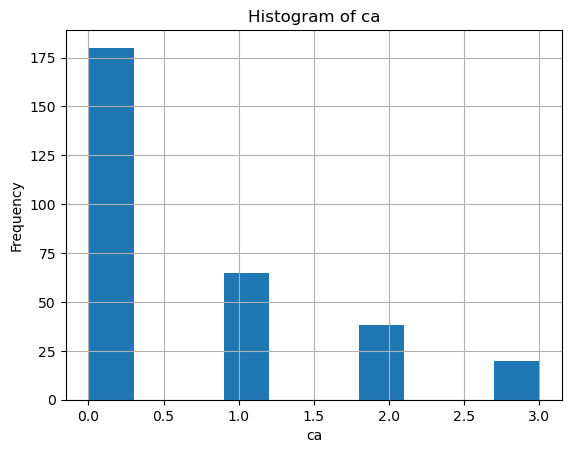

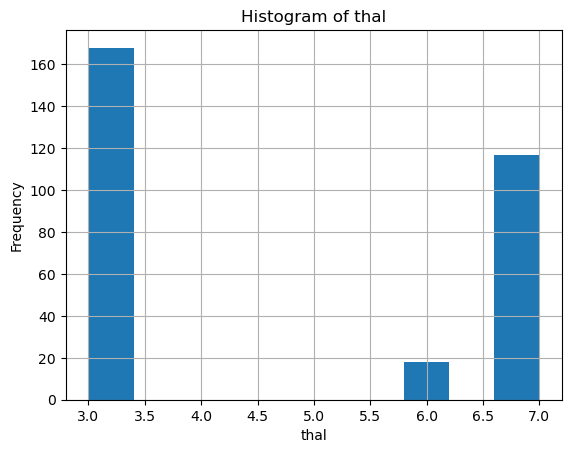

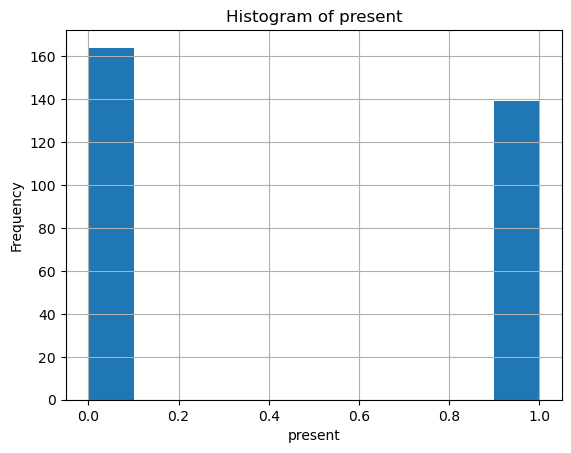

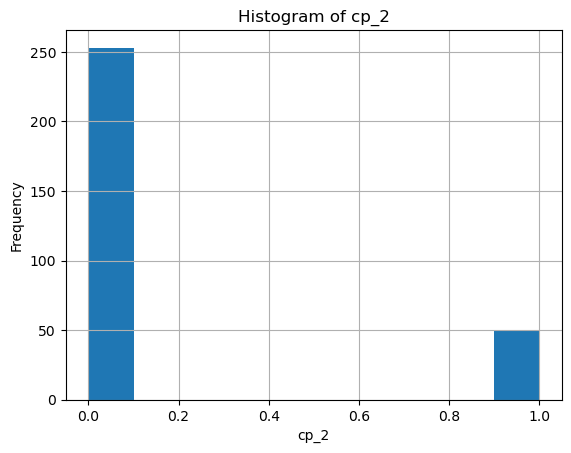

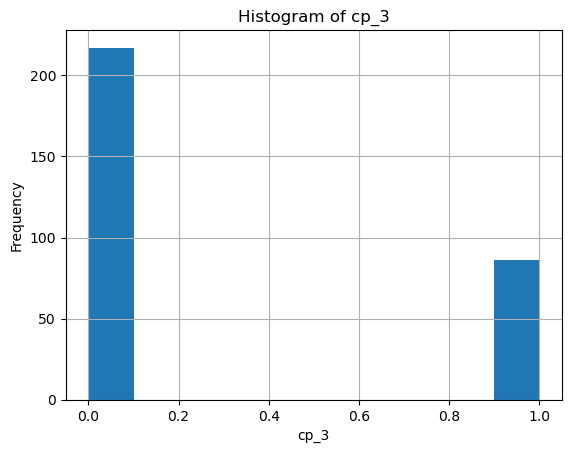

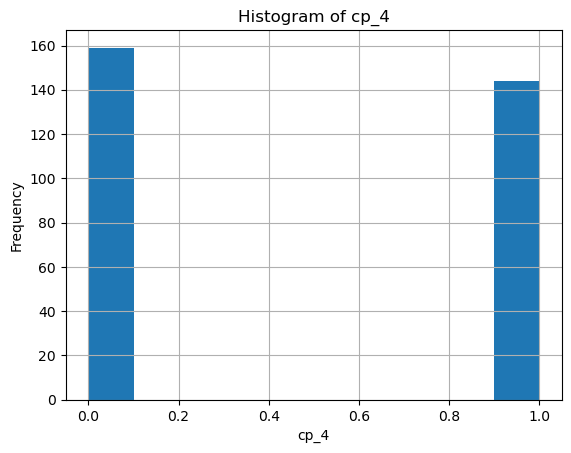

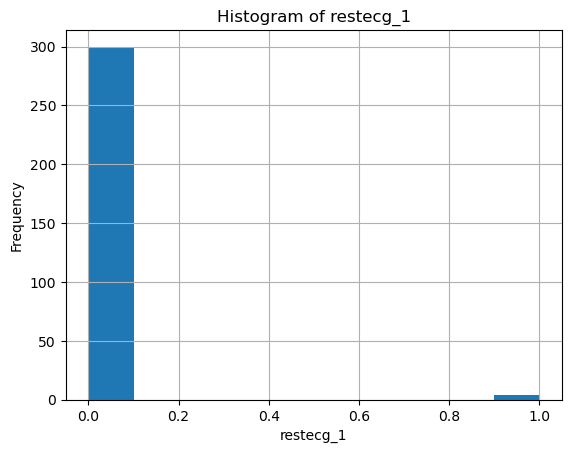

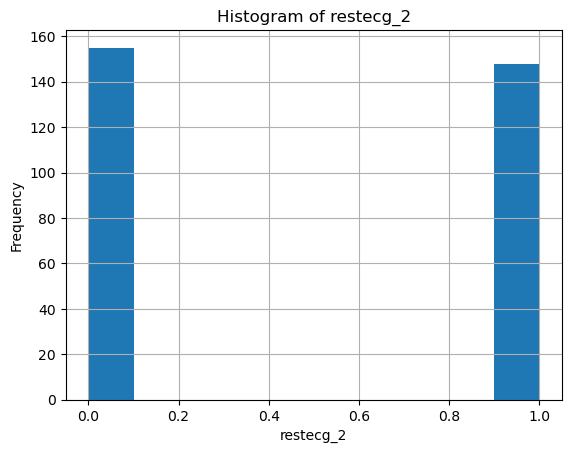

In [159]:
# Create histograms to understand the distribution of each predictor

for column in heart_cl.columns:
    plt.figure()
    heart_cl[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

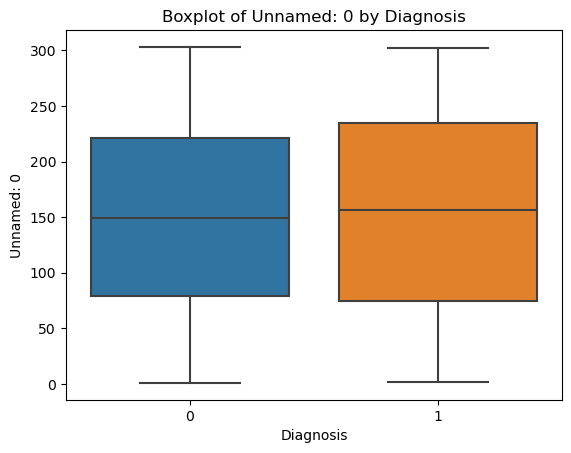

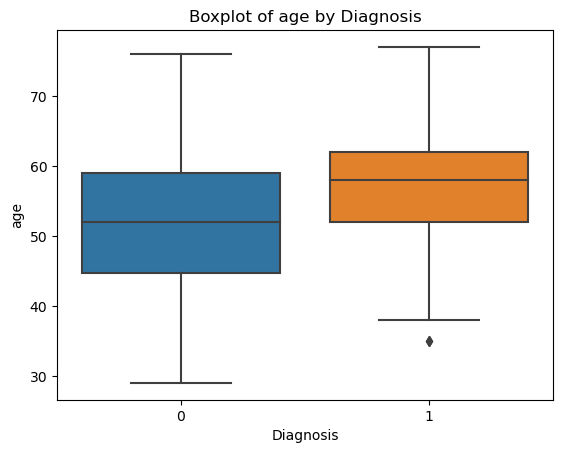

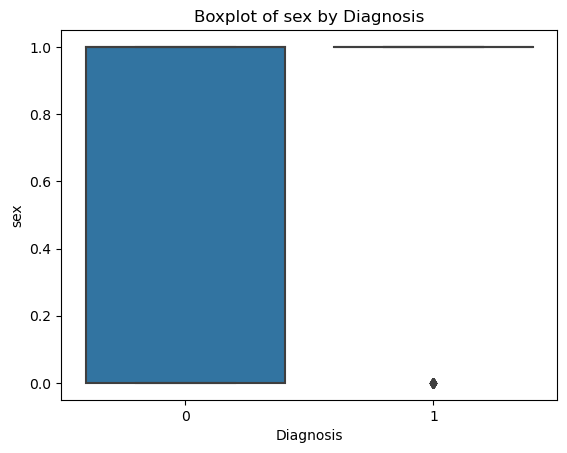

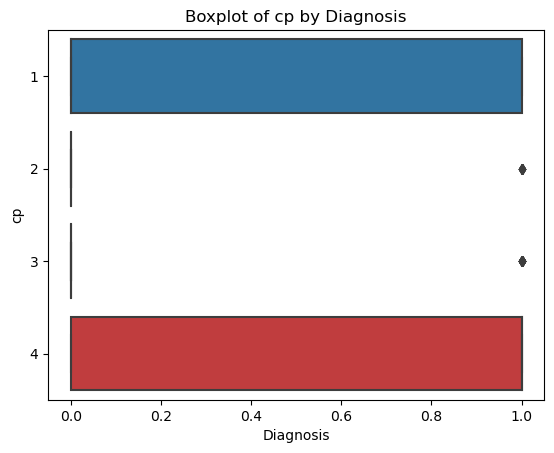

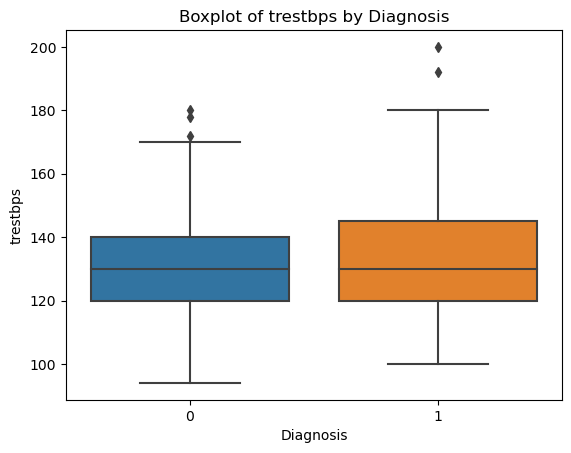

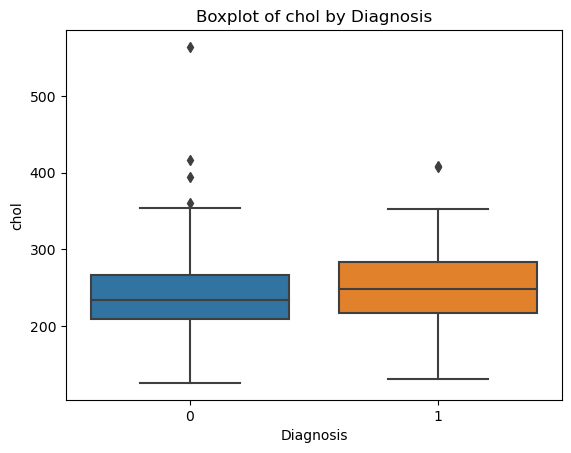

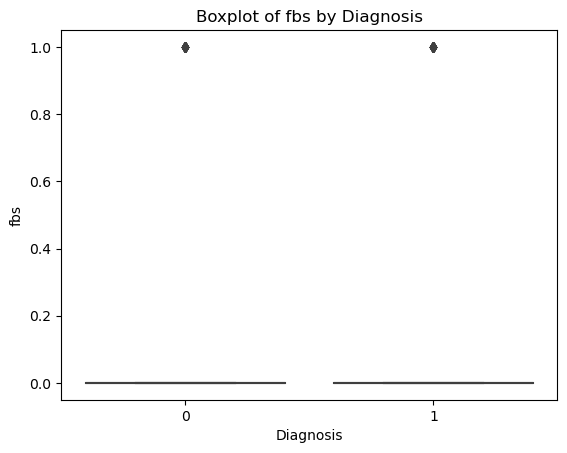

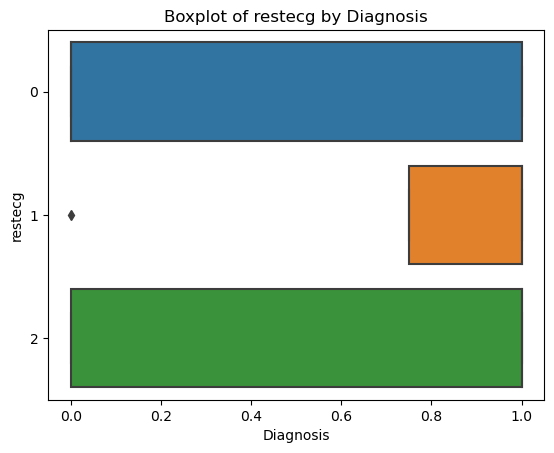

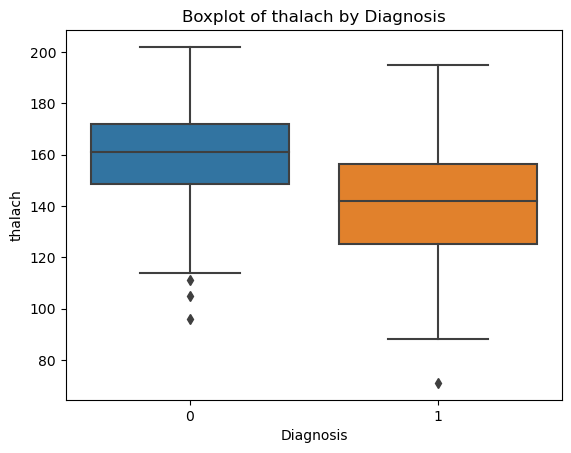

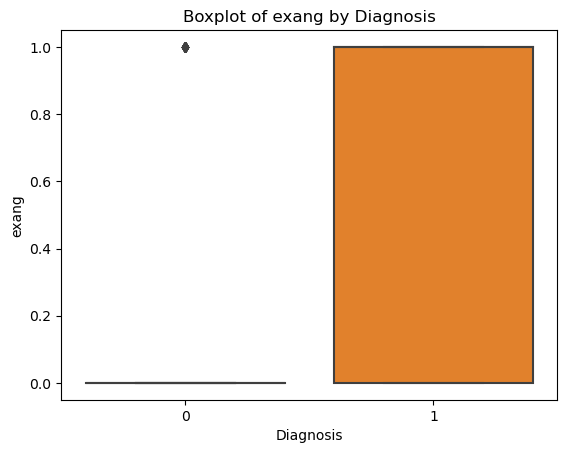

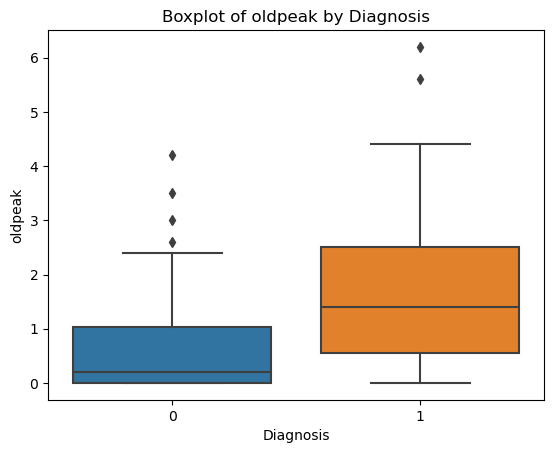

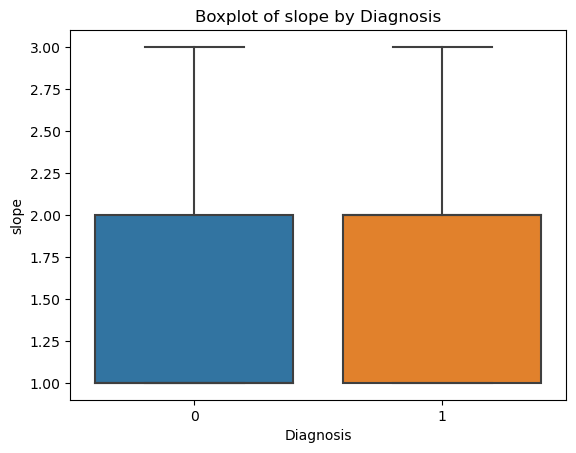

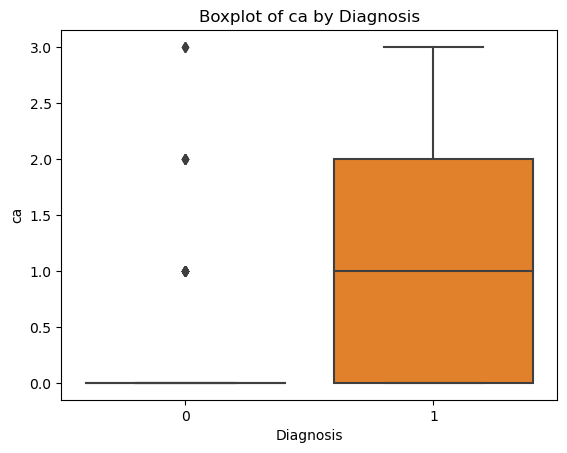

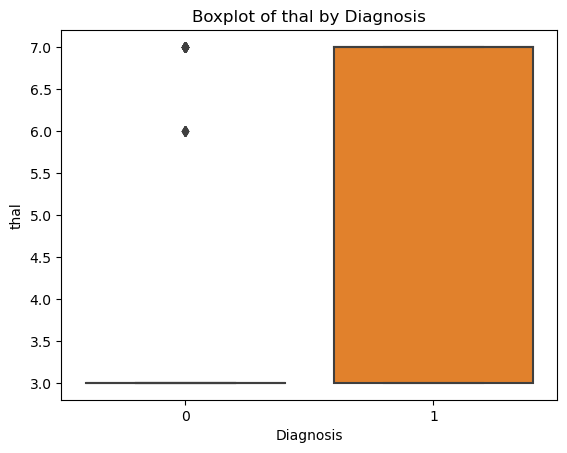

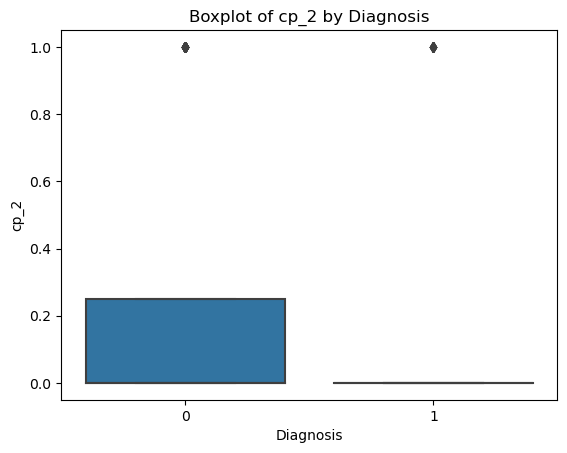

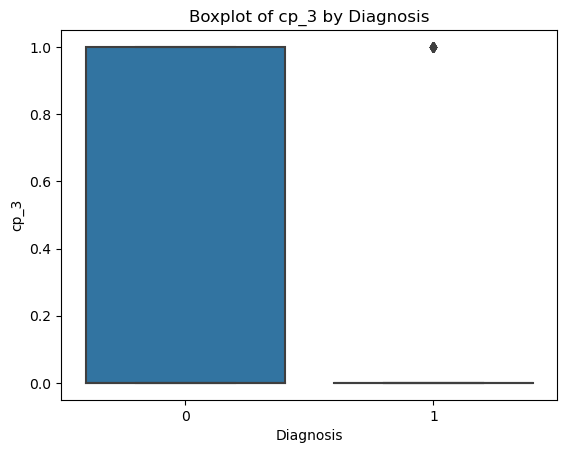

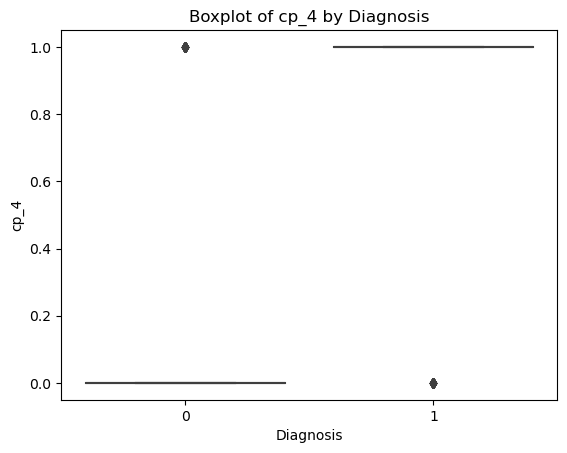

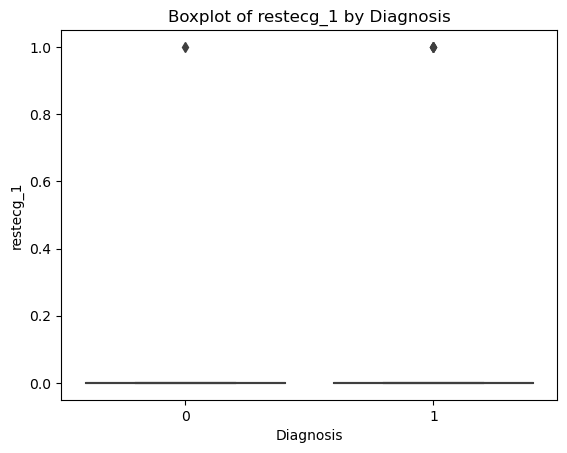

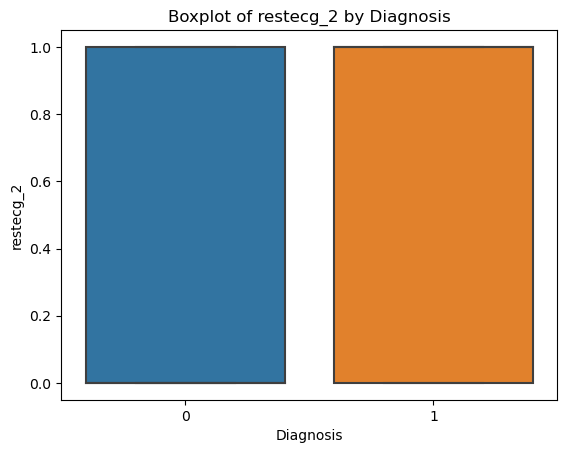

In [160]:
# Create boxplots to compare the distribution of numerical predictors across different outcomes.
for column in heart_cl.drop('present', axis=1).columns:
    plt.figure()
    sns.boxplot(x='present', y=column, data=heart_cl)
    plt.title(f'Boxplot of {column} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(column)

Based on the relationships (clear split in diagnosis) I'm seeing in these plots I'm going to include 'age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'cp' in my model. 

## Dividing the Data

In [161]:
# Split out the target from the predictors
X = heart_cl.drop('present', axis=1)
y = heart_cl['present']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Check for cases in both sets
y_train.value_counts(), y_test.value_counts()

(0    133
 1    109
 Name: present, dtype: int64,
 0    31
 1    30
 Name: present, dtype: int64)

## Building the Model

These are some guiding questions that we should think about:

- What is the overall training accuracy? Sensitivity and specificity?
- Does the model perform better on cases or non-cases? Or does it perform equally well?


These training metrics are overly optimistic estimations of how the model performs, so we should expect slightly worse metrics if the model is general enough. If these metrics are too high, it might be a sign that our model is starting to overfit.

In [165]:
# Create subset based on chosen prediuctors
X_train_sub = X_train[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'cp']]

# Construct model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_sub, y_train)
predictions = model.predict(X_train_sub)

# Calculate accuracy
train_accuracy = model.score(X_train_sub, y_train)

# Calculate sensitivity
tp = sum((y_train == 1) & (predictions == 1))
fn = sum((y_train == 1) & (predictions == 0))
train_sensitivity = tp / (tp + fn)

# Calculate specificity
tn = sum((predictions==0) & (y_train==0))
fp = sum((predictions==1) & (y_train==0))
train_specificity = tn / (tn+fp)

train_accuracy, train_sensitivity, train_specificity

(0.8512396694214877, 0.7981651376146789, 0.8947368421052632)

The model is looking strong with accuracy at 85%, sensitivity at nearly 80% and specificity at nearly 90%. Potentially, thee numbers are too high and we have overfit the model but maybe not. 

## Interpreting the Model Coefficients
Let's see what our chosen predictors suggest about their relationship with heart disease.

In [172]:
# Examine the coefficients of logistic regression model on the log-odds scale
coefficients = model.coef_

coefficients

array([[-0.00604571,  0.75630752,  0.28417695, -0.02302918,  0.76257392,
         0.36717838,  0.97571589,  0.39415643,  0.28417695]])

In [173]:
# Examine the coefficients of logistic regression model on the odds scale
model_or = np.exp(coefficients)

model_or

array([[0.99397253, 2.13039523, 1.32866802, 0.97723397, 2.14378707,
        1.44365542, 2.65306585, 1.48313254, 1.32866802]])

The coefficients all suggest that an increase in each would likely affect the outcome. This makes sense based on waht these variables are. 

# Final Model Evaluation

In [183]:
X_test_sub = X_test[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'cp']]
test_preds = model.predict(X_test_sub)

# Calculate accuracy
test_accuracy = model.score(X_test_sub, y_test)

# Calculate sensitivity
tpt = sum((y_test == 1) & (test_preds == 1))
fnt = sum((y_test == 1) & (test_preds == 0))
test_sensitivity = tpt / (tpt + fnt)

# Calculate specificity
tnt = sum((test_preds==0) & (y_test==0))
fpt = sum((test_preds==1) & (y_test==0))
test_specificity = tnt / (tnt+fpt)

test_accuracy, test_sensitivity, test_specificity

(0.819672131147541, 0.7666666666666667, 0.8709677419354839)

We lost some ground on the test set but the accuracy (82%), sensitivity (77%) and specificity (87%) are all still high. This suggests that the model is doing a good job predicting the diagnosis.  

## Drawing Conclusions

##### Does the model make sense when considering its interpretation? Does it seem to match up with what you might expect?
Based on what I know about heart disease and the features selected, the model makes sense. 

##### Does the model seem to predict the cases or non-cases better than the other? Why might this be the case, based on your model?
The model has lower sensitivity than specificity so it seems to predict non-cases better than cases. 

##### How would you interpret the accuracy for the model? Does this accuracy seem acceptable for use in an actual clinical setting?
82% accuracy seems decent but giuven we're predicting someghing serious maybe it isn't good enough. It's a conservative model because the specificity is higher at 87% so it overpredicts, 